<a href="https://colab.research.google.com/github/nicolaschavezarenas/proyecto_final_DS1/blob/main/Proyecto_ParteIIII_Chavez.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Análisis de Precio de Venta de Autos Usados en USA**

**Abstract**

Este informe presenta un análisis de los factores que influyen en el precio de venta de vehículos usados en Estados Unidos, con un enfoque en tres hipótesis principales: la influencia del kilometraje y del color del vehículo en su valor de venta; además de la diferencia en el kilometraje de vehículos según su transmisión. Utilizando un conjunto de datos de ventas de autos usados, se realizaron varios análisis estadísticos para evaluar la validez de estas hipótesis.

La primera hipótesis planteada sugiere que el kilometraje de un vehículo tiene una influencia directa en su precio de venta. Este razonamiento se basa en la premisa de que a mayor kilometraje, mayor es el desgaste del vehículo, lo cual debería reflejarse en un precio de venta más bajo. Tras realizar el análisis de correlación entre el kilometraje y el precio, se encontró una correlación negativa significativa. Confirmando de esta menera la hipótesis.

La segunda hipótesis plantea que el color del vehículo influye en su precio de venta. Este supuesto está basado en la percepción común de que ciertos colores pueden ser más atractivos o deseados por los compradores, lo cual podría traducirse en un valor de reventa mayor. Para evaluar esta hipótesis, se realizaron comparaciones entre los precios medios un mismo vehículo en sus diferentes colores. Sin embargo, los resultados mostraron que, aunque existen variaciones en los precios medios según el color, estas diferencias no son lo suficientemente significativas como para confirmar la hipótesis.

Como tercera hipótesis se plantea que existe un mayor kilometraje en vehículos mecánicos que en automáticos al momento de vender, todo esto de acuerdo a que se cree que los vehículos mecánicos tienen una mayor resistencia a kilometrajes altos. Al revisar la data y comprendiendo que el mercado estadounidense se basa en más de un 90% en vehículos automáticos, podemos concluir que la hipótesis para este mercado es falsa, ya que al revisar en distintas marcas podemos evidenciar que para algunos casos se cumple y otros no, por lo que no es aplicable a toda la muestra.

En conclusión, el análisis de los datos de ventas de vehículos usados en Estados Unidos confirma que el kilometraje es un factor clave en la determinación del precio de venta, mientras que el color del vehículo tiene una influencia insignificante. Por otro lado también pudimos concluir que la transmisión del vehículo no es un factor determinante para la duración del vehículo, basados en su kilometraje. Estos hallazgos son útiles para compradores y vendedores de autos usados, ya que ofrecen una perspectiva clara sobre los factores que más afectan el valor de reventa de un vehículo.



#Carga de la data

In [2]:
# importar librerias
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
#Cargo Data Frame y reviso los campos
df = pd.read_csv("https://raw.githubusercontent.com/nicolaschavezarenas/proyecto_final_DS1/main/car_prices.csv")
df.head()

,year,make,model,trim,body,transmission,vin,state,condition,odometer,color,interior,seller,mmr,sellingprice,saledate
0,2015,Kia,Sorento,LX,SUV,automatic,5xyktca69fg566472,ca,5.0,16639.0,white,black,kia motors america inc,20500.0,21500.0,Tue Dec 16 2014 12:30:00 GMT-0800 (PST)
1,2015,Kia,Sorento,LX,SUV,automatic,5xyktca69fg561319,ca,5.0,9393.0,white,beige,kia motors america inc,20800.0,21500.0,Tue Dec 16 2014 12:30:00 GMT-0800 (PST)
2,2014,BMW,3 Series,328i SULEV,Sedan,automatic,wba3c1c51ek116351,ca,45.0,1331.0,gray,black,financial services remarketing (lease),31900.0,30000.0,Thu Jan 15 2015 04:30:00 GMT-0800 (PST)
3,2015,Volvo,S60,T5,Sedan,automatic,yv1612tb4f1310987,ca,41.0,14282.0,white,black,volvo na rep/world omni,27500.0,27750.0,Thu Jan 29 2015 04:30:00 GMT-0800 (PST)
4,2014,BMW,6 Series Gran Coupe,650i,Sedan,automatic,wba6b2c57ed129731,ca,43.0,2641.0,gray,black,financial services remarketing (lease),66000.0,67000.0,Thu Dec 18 2014 12:30:00 GMT-0800 (PST)


#Limpieza de Datos
Antes de graficar y analizar los resultados, revisaré que los tipos de datos se hayan definido correctamente en base a lo planteado en el origen del dataset: https://www.kaggle.com/datasets/syedanwarafridi/vehicle-sales-data

In [ ]:
#reviso tipos de datos detectados por pandas
df.dtypes

,0
year,int64
make,object
model,object
trim,object
body,object
transmission,object
vin,object
state,object
condition,float64
odometer,float64


In [ ]:
#En base al resultado anterior, se debe modificar el tipo de datos del campo Year (a categórico) y saledate a fecha
df['year'] = df['year'].astype("category")
df['saledate'] = df['saledate'].str.split(' GMT').str[0]
df['saledate'] = pd.to_datetime(df['saledate'], errors='coerce')
df.head()

,year,make,model,trim,body,transmission,vin,state,condition,odometer,color,interior,seller,mmr,sellingprice,saledate
0,2015,Kia,Sorento,LX,SUV,automatic,5xyktca69fg566472,ca,5.0,16639.0,white,black,kia motors america inc,20500.0,21500.0,2014-12-16 12:30:00
1,2015,Kia,Sorento,LX,SUV,automatic,5xyktca69fg561319,ca,5.0,9393.0,white,beige,kia motors america inc,20800.0,21500.0,2014-12-16 12:30:00
2,2014,BMW,3 Series,328i SULEV,Sedan,automatic,wba3c1c51ek116351,ca,45.0,1331.0,gray,black,financial services remarketing (lease),31900.0,30000.0,2015-01-15 04:30:00
3,2015,Volvo,S60,T5,Sedan,automatic,yv1612tb4f1310987,ca,41.0,14282.0,white,black,volvo na rep/world omni,27500.0,27750.0,2015-01-29 04:30:00
4,2014,BMW,6 Series Gran Coupe,650i,Sedan,automatic,wba6b2c57ed129731,ca,43.0,2641.0,gray,black,financial services remarketing (lease),66000.0,67000.0,2014-12-18 12:30:00


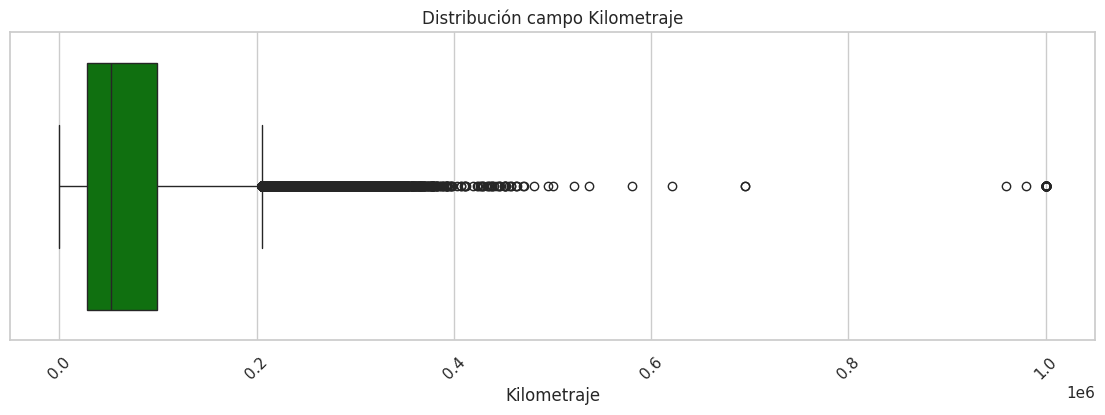

In [ ]:
#Revisaré los campos odometer y selling price, eliminando valores vacíos y extraños que pudieran resultar en malas conclusiones de las hipotesis
plt.figure(figsize=(14, 4))
sns.boxplot(x="odometer", data=df,color='Green')
plt.xlabel('Kilometraje')
plt.title('Distribución campo Kilometraje')
plt.xticks(rotation=45)
sns.set_theme(style="whitegrid")
plt.show()


En la gráfica anterior, se evidencia que existen valores que escapan de lo lógico para la columna Kilometraje, por lo que se excluirán kilometrajes mayores a 250.000 según esta [Fuente](https://www.euromaster-neumaticos.es/blog/duracion-kilometros-coche#:~:text=%C2%BFEs%20posible%20estimar%20cu%C3%A1ntos%20kil%C3%B3metros,250%2C000%20a%20300%2C000%20kil%C3%B3metros%20recorridos.)

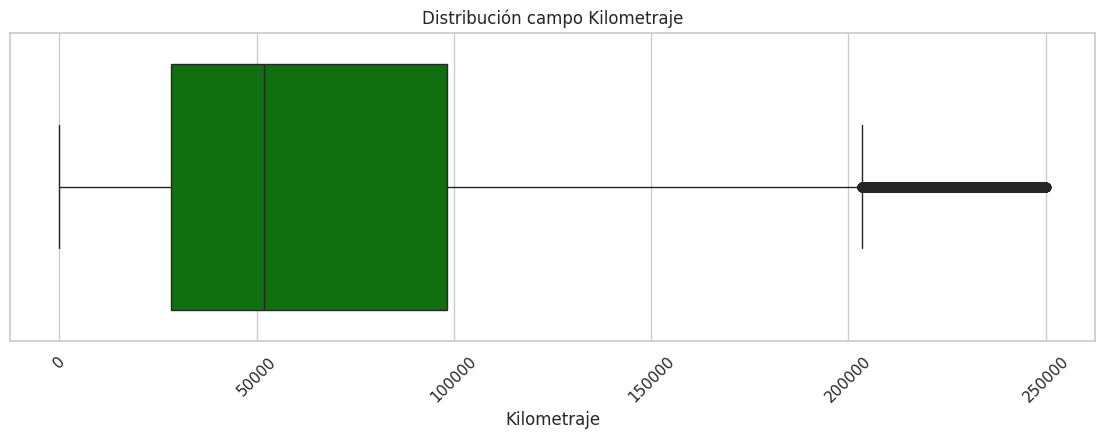

In [ ]:
#Se eliminan filas con kilometraje mayor a 250.000

df = df[df['odometer'] <=250000]

plt.figure(figsize=(14, 4))
sns.boxplot(x="odometer", data=df,color='Green')
plt.xlabel('Kilometraje')
plt.title('Distribución campo Kilometraje')
plt.xticks(rotation=45)
plt.show()

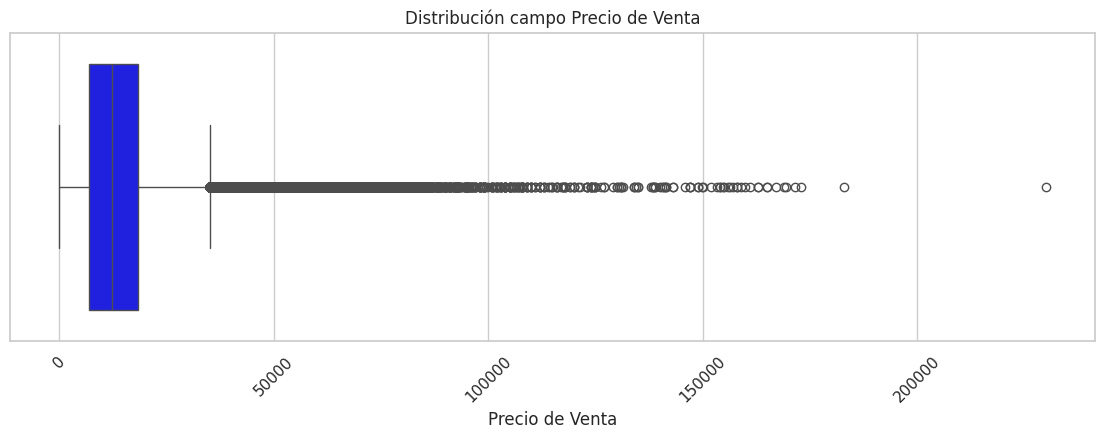

In [ ]:
#Ahora haremos la misma revisión con el precio de los autos
plt.figure(figsize=(14, 4))
sns.boxplot(x="sellingprice", data=df,color='Blue')
plt.xlabel('Precio de Venta')
plt.title('Distribución campo Precio de Venta')
plt.xticks(rotation=45)
plt.show()



En este caso no realizaremos cambios ni omisiones en la data, ya que el precio de venta de un vehículo pueden incluir muchos factores, y es factible un auto de un precio máximo superior a los 200.000 dólares

In [ ]:
#Ahora revisaré algunos campos string para verificar la integridad de la data

valores_year = df['year'].value_counts(dropna=False)
print("\nConteo de valores en Año:")
print(valores_year)


Conteo de valores en Año:
year
2012    102301
2013     98160
2014     81063
2011     48512
2008     31364
2007     30675
2006     26708
2010     26398
2005     21176
2009     20514
2004     17109
2003     12999
2015      9437
2002      9435
2001      6230
2000      4977
1999      3146
1998      1990
1997      1417
1996       776
1995       635
1994       354
1993       183
1992       117
1991        64
1990        48
1989        20
1988        11
1986        10
1985        10
1987         8
1984         5
1982         2
1983         1
Name: count, dtype: int64


In [ ]:
#Al ver que la variable año está completa, revisaré otras variables

#Marca
marca_vacio=df[df['make'].isna()]

marca_vacio['make'].isna().sum()

10096

In [ ]:
#Existe +10.000 filas con el campo marca vacio, por lo que estas filas se eliminarán del data frame principal ya que no son útiles en el contexto del negocio

df = df.dropna(subset=['make'])

marca_vacio=df[df['make'].isna()]

marca_vacio['make'].isna().sum()

0

In [ ]:
#Ahora haré lo mismo con las variables modelo y transmisión
#Primero reviso si hay valores vacíos en la variable modelo

modelo_vacio=df[df['model'].isna()]

modelo_vacio['model'].isna().sum()


98

In [ ]:
#Ahora elimino los valores vacíos de la variable modelo
df = df.dropna(subset=['model'])

modelo_vacio=df[df['model'].isna()]

modelo_vacio['model'].isna().sum()

0

In [ ]:
#Finalmente reviso la variable transmisión
transmision_vacio=df[df['transmission'].isna()]

transmision_vacio['transmission'].isna().sum()


63124

In [ ]:
#También eliminaremos estos casos del data frame ya que ensucian el análisis de las hipótesis

df= df.dropna(subset=['transmission'])

transmision_vacio=df[df['transmission'].isna()]

transmision_vacio['transmission'].isna().sum()

0

## Hipótesis 1
La primera hipótesis a revisar será que existe una diferencia significativa en los precios de un mismo modelo de auto en base a su kilometraje

<ipython-input-50-7560c3442e7f>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=conteo_marca_modelo.values, y=conteo_marca_modelo.index,palette='Greens_r')


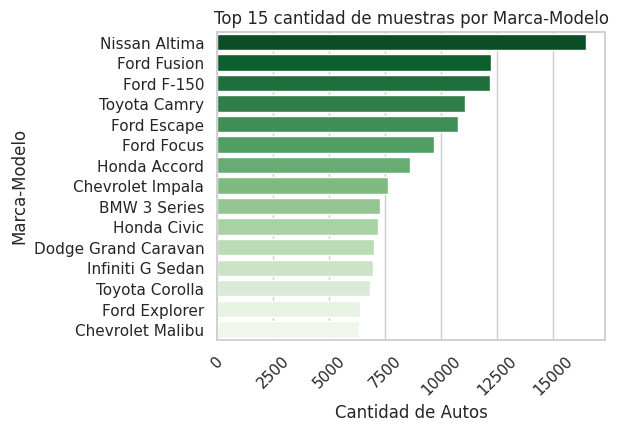

In [ ]:
#Primero revisaré la cantidad de autos por marca-modelo que hay en nuestra base, para esto creamos un nuevo campo que concatene los otros dos
df['marca_modelo']=df['make']+' '+df['model']
conteo_marca_modelo = df['marca_modelo'].value_counts()
#Dejo en la gráfica el top 15 con mayor cantidad de vehículos del data frame
conteo_marca_modelo=conteo_marca_modelo.nlargest(15)


plt.figure(figsize=(5, 4))
sns.barplot(x=conteo_marca_modelo.values, y=conteo_marca_modelo.index,palette='Greens_r')
plt.xlabel('Cantidad de Autos')
plt.ylabel('Marca-Modelo')
plt.title('Top 15 cantidad de muestras por Marca-Modelo')
plt.xticks(rotation=45)
plt.show()

A modo de simplificación de las vistas, para los siguientes análisis de la hipótesis planteada seguiré trabajando con las 3 marca-modelo con las con muestra más grandes.

In [ ]:
#Ahora miraremos como se comporta la variable kilometraje para los precios de auto de los top 3 marca-modelo de diferentes marcas

df_top3=df[df['marca_modelo'].isin(['Nissan Altima','Ford F-150','Toyota Camry'])]
df_top3.head()

,year,make,model,trim,body,transmission,vin,state,condition,odometer,color,interior,seller,mmr,sellingprice,saledate,marca_modelo
5,2015,Nissan,Altima,2.5 S,Sedan,automatic,1n4al3ap1fn326013,ca,1.0,5554.0,gray,black,enterprise vehicle exchange / tra / rental / t...,15350.0,10900.0,2014-12-30 12:00:00,Nissan Altima
15,2015,Nissan,Altima,2.5 S,Sedan,automatic,1n4al3ap5fc124223,ca,2.0,11398.0,black,black,enterprise vehicle exchange / tra / rental / t...,14750.0,14100.0,2014-12-23 12:00:00,Nissan Altima
51,2015,Nissan,Altima,2.5 S,Sedan,automatic,1n4al3ap4fn313644,ca,NaN,10678.0,gray,black,enterprise vehicle exchange / tra / rental / t...,15150.0,11600.0,2014-12-18 12:00:00,Nissan Altima
53,2015,Nissan,Altima,2.5 S,Sedan,automatic,1n4al3ap1fn331213,ca,1.0,4314.0,black,black,enterprise vehicle exchange / tra / rental / t...,15500.0,11500.0,2014-12-30 12:00:00,Nissan Altima
103,2015,Nissan,Altima,2.5 S,Sedan,automatic,1n4al3ap4fn310470,ca,1.0,12752.0,gray,black,enterprise vehicle exchange / tra / rental / t...,14600.0,9500.0,2014-12-30 13:00:00,Nissan Altima


<Figure size 1400x600 with 0 Axes>

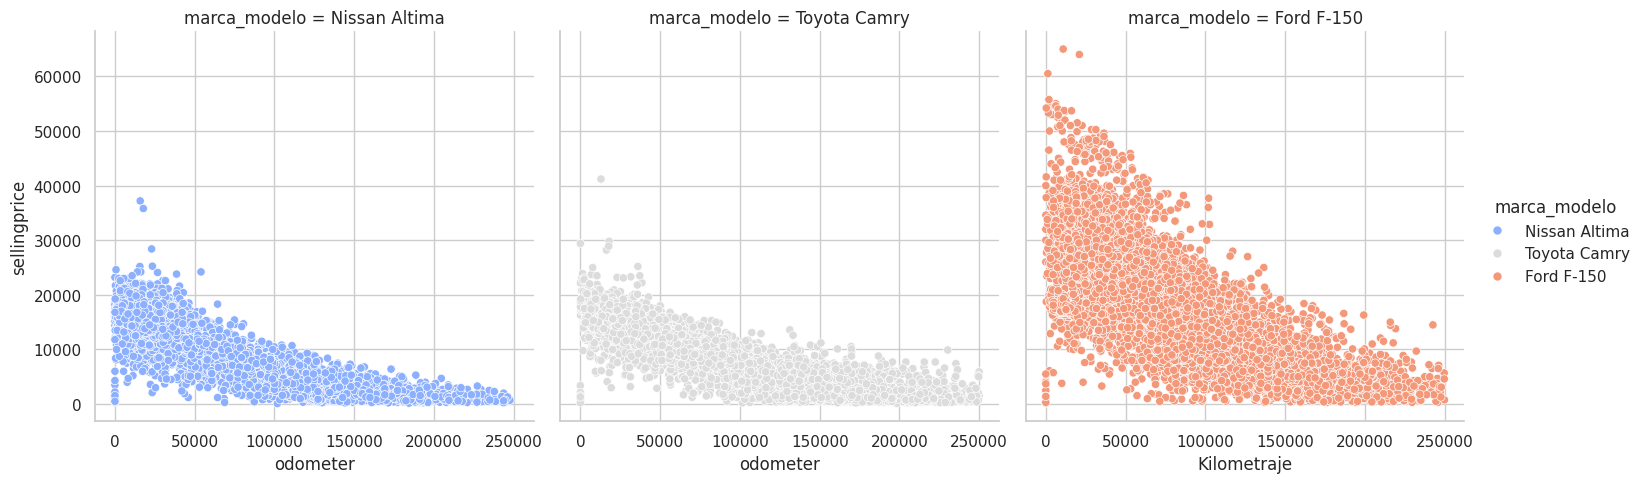

In [ ]:
#Crearé un gráfico de dispersión para ver la correlación entre el precio y el kilometraje de los autos para los top 3 marca-modelo

plt.figure(figsize=(14, 6))
sns.relplot(data=df_top3, x="odometer", y="sellingprice",hue="marca_modelo" ,col='marca_modelo',kind="scatter",palette='coolwarm')
plt.xlabel('Kilometraje')
plt.ylabel('Precio de Venta')
plt.show()

Gracias a esta gráfica podemos visualizar claramente que existe una correlación negativa entre las variables precio de venta y kilometraje para los 3 modelos estudiados. Donde se observa que a un mayor precio de venta el kilometraje de los vehículos es menor. Esta clara tendencia nos permite confirmar que la hipótesis planteada es verdadera.

## Hipótesis 2
Como segunda hipótesis a comprobar es que existen modelos en que el precio de venta de un mismo auto de un mismo año y de la misma transmisión tienen precios diferentes en base al color, por lo que el color es una variable significativa para definir el precio de un vehículo usado.

In [ ]:
#Primero crearemos un identificador de modelo por marca, modelo, transmisión y año.

df['identificador_autos'] = df['year'].astype('str')+"/"+df['make']+"/"+df['model']+"/"+df['transmission']

<ipython-input-54-06a90ecd2a06>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=conteo_identificador.values, y=conteo_identificador.index,palette='Blues_r')


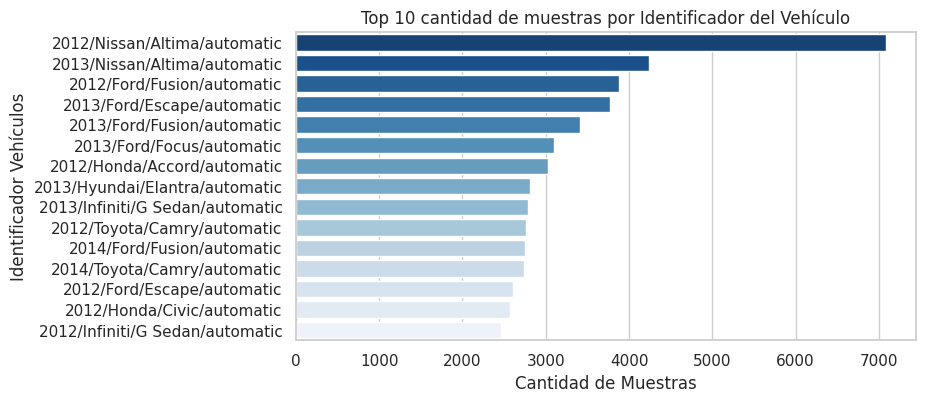

In [ ]:
#Procederé a realizar la primera gráfica para tomar el identificador de autos con mayor cantidad de muestras

conteo_identificador = df['identificador_autos'].value_counts()
#Dejo en la gráfica el top 10 con mayor cantidad de muestras
conteo_identificador=conteo_identificador.nlargest(15)


plt.figure(figsize=(8, 4))
sns.barplot(x=conteo_identificador.values, y=conteo_identificador.index,palette='Blues_r')
plt.xlabel('Cantidad de Muestras')
plt.ylabel('Identificador Vehículos')
plt.title('Top 10 cantidad de muestras por Identificador del Vehículo')
plt.xticks()
plt.show()


Para comprobar la hipótesis y simplificar el proceso, nos quedaremos con el modelo con mayor cantidad de muestras, que en este caso sería el Nisann Altima Automático del año 2012.

In [ ]:
#Crearemos una submuestra con las filas del identificador seleccionado para el análisis

df_NissanAltima=df[df['identificador_autos']=='2012/Nissan/Altima/automatic']
df_NissanAltima.head()

,year,make,model,trim,body,transmission,vin,state,condition,odometer,color,interior,seller,mmr,sellingprice,saledate,marca_modelo,identificador_autos
1561,2012,Nissan,Altima,2.5 S,Sedan,automatic,1n4al2apxcn433082,ca,25.0,35691.0,gray,black,nissan-infiniti lt,12300.0,10500.0,2014-12-16 12:30:00,Nissan Altima,2012/Nissan/Altima/automatic
1568,2012,Nissan,Altima,2.5 S,Sedan,automatic,1n4al2apxcn440467,ca,46.0,37161.0,gold,beige,nissan-infiniti lt,12200.0,12250.0,2014-12-16 12:30:00,Nissan Altima,2012/Nissan/Altima/automatic
1570,2012,Nissan,Altima,2.5 S,Sedan,automatic,1n4al2ap5cn547233,ca,35.0,61267.0,red,black,sama california auto export inc,9925.0,9800.0,2014-12-16 12:30:00,Nissan Altima,2012/Nissan/Altima/automatic
1572,2012,Nissan,Altima,2.5 S,Sedan,automatic,1n4al2ap5cn454566,ca,38.0,36353.0,white,black,nissan-infiniti lt,12250.0,12000.0,2014-12-16 12:30:00,Nissan Altima,2012/Nissan/Altima/automatic
1574,2012,Nissan,Altima,2.5 S,Sedan,automatic,1n4al2ap7cn400752,ca,25.0,77489.0,blue,black,balboa thrift & loan association,9125.0,8000.0,2014-12-16 12:00:00,Nissan Altima,2012/Nissan/Altima/automatic


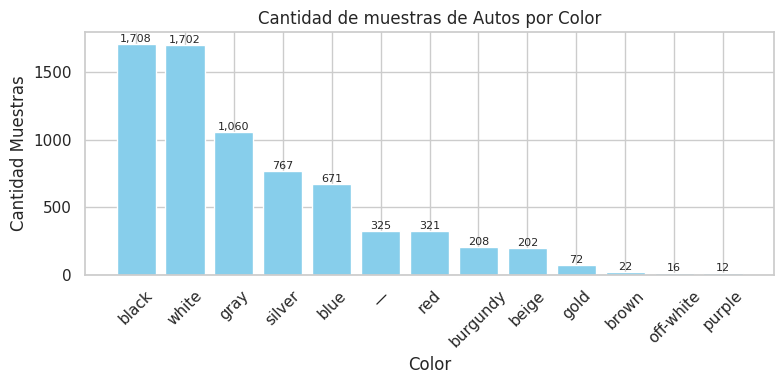

In [ ]:
#Antes de comprobar la hipotesis, revisaremos el volumen de muestras que tenemos para cada color, de forma de que sean representativas

cantidad_por_color=df_NissanAltima['color'].value_counts()

plt.figure(figsize=(8, 4))
bars=plt.bar(cantidad_por_color.index, cantidad_por_color.values, color='skyblue')
plt.xlabel('Color')
plt.ylabel('Cantidad Muestras')
plt.title('Cantidad de muestras de Autos por Color')
plt.xticks(rotation=45)
plt.tight_layout()


for bar in bars:
    height = bar.get_height()
    plt.text(
        bar.get_x() + bar.get_width() / 2,
        height,
         f'{height:,.0f}',
        ha='center',
        va='bottom',
        fontsize=8
    )

plt.show()


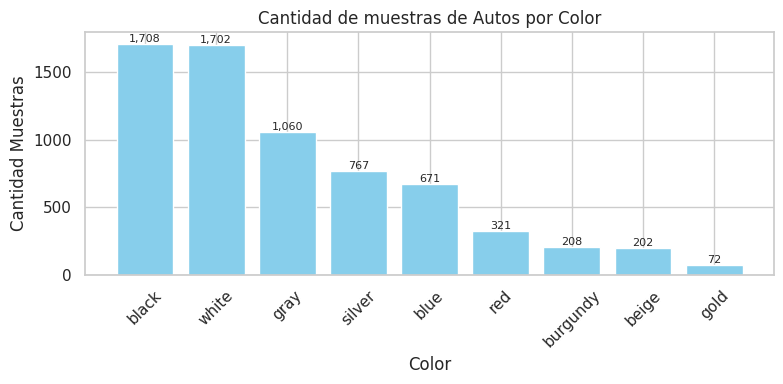

In [ ]:
#Se eliminarán de la base los casos con Color== "-" y los colores con una muestra menos a 50 datos para que sean representativas
df_NissanAltima=df_NissanAltima[df_NissanAltima['color']!="—"]
df_NissanAltima=df_NissanAltima[df_NissanAltima['color']!="brown"]
df_NissanAltima=df_NissanAltima[df_NissanAltima['color']!="off-white"]
df_NissanAltima=df_NissanAltima[df_NissanAltima['color']!="purple"]

#Creo nuevamente el gráfico anterior
cantidad_por_color=df_NissanAltima['color'].value_counts()

plt.figure(figsize=(8, 4))
bars=plt.bar(cantidad_por_color.index, cantidad_por_color.values, color='skyblue')
plt.xlabel('Color')
plt.ylabel('Cantidad Muestras')
plt.title('Cantidad de muestras de Autos por Color')
plt.xticks(rotation=45)
plt.tight_layout()

for bar in bars:
    height = bar.get_height()
    plt.text(
        bar.get_x() + bar.get_width() / 2,
        height,
         f'{height:,.0f}',
        ha='center',
        va='bottom',
        fontsize=8
    )

plt.show()


<ipython-input-58-63c2769f0da2>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='color', y='sellingprice', data=df_NissanAltima, palette=colores)


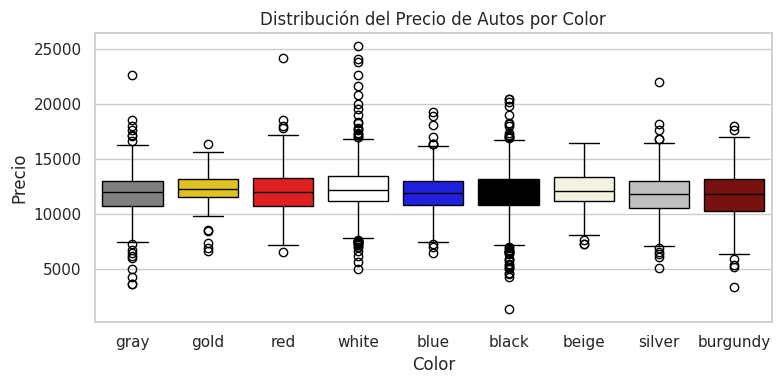

In [ ]:
#Ahora comprobaremos la hipótesis usando un boxplot

colores = ['gray', 'gold', 'red', 'white', 'blue', 'black', 'beige', 'silver', 'darkred']


plt.figure(figsize=(8, 4))
sns.boxplot(x='color', y='sellingprice', data=df_NissanAltima, palette=colores)
plt.xlabel('Color')
plt.ylabel('Precio')
plt.title('Distribución del Precio de Autos por Color')
plt.tight_layout()

plt.show()

Con esta gráfica podemos ver que las medianas de los precios son bastante similares para todos los colores, lo que indica que el color del auto no tiene un gran impacto en el precio mediano.
Sin embargo, la mediana para autos de color dorado parece estar ligeramente más alta que la de otros colores, aunque la diferencia no es muy significativa.
Para confirmar lo recién planteado, realizaré una gráfica con el precio promedio de cada color.

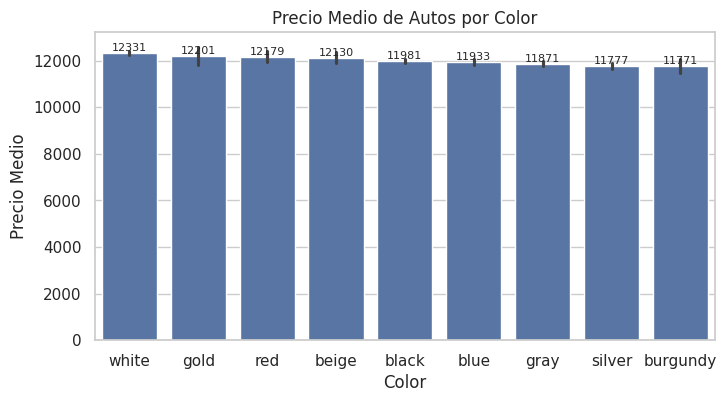

In [ ]:
#Gráfica con precio medio por color

plt.figure(figsize=(8, 4))

sns.barplot(x='color', y='sellingprice', data=df_NissanAltima, estimator=np.mean, order=df_NissanAltima.groupby('color')['sellingprice'].mean().sort_values(ascending=False).index)

plt.title('Precio Medio de Autos por Color')
plt.ylabel('Precio Medio')
plt.xlabel('Color')

precio_promedio = df_NissanAltima.groupby('color')['sellingprice'].mean().sort_values(ascending=False)
for i, v in enumerate(precio_promedio):
    plt.text(i, v, f'{v:.0f}', ha='center', va='bottom',fontsize=8)

plt.show()

Mirando esta gráfica, podemos ver que el precio medio tiene una diferencia entre los diferentes colores el Nissan Altima automático 2012, siendo los autos de color blanco un 5% más caros que los de color Borgoña o Plateado. Si bien esta diferencia puede parecer poco significativa, para el caso de un vehículo de más de $10.000 dolares puede ser significativa para la toma de decisiones del consumidor. Al ser solo la muestra de un vehículo no podemos concluir directamente sobre el universo muestral.

##Hipótesis 3
Para la tercera y última hipótesis, comprobaré si existe una diferencia significativa en el Kilometraje de autos automáticos y mecánicos de las principales marcas del mercado, que nos lleve a concluir que los vehículos mecánicos se venden cuando alcanzan un kilometraje mayor que uno automático.

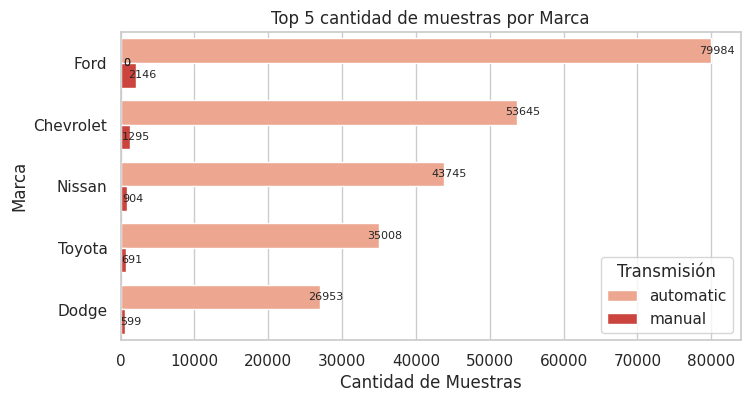

In [ ]:
#Primero me quedaré con las 5 principales marcas en base a la cantidad de muestras de la base.

top_marcas = df['make'].value_counts().nlargest(5).index
df_marcas_top = df[df['make'].isin(top_marcas)]


plt.figure(figsize=(8, 4))
ax=sns.countplot(y='make', hue='transmission', data=df_marcas_top, order=top_marcas, palette='Reds')
plt.xlabel('Cantidad de Muestras')
plt.ylabel('Marca')
plt.title('Top 5 cantidad de muestras por Marca')
plt.legend(title='Transmisión')

for p in ax.patches:
    width = p.get_width()
    plt.text(width+800,
             p.get_y() + p.get_height() / 2,
             int(width),
             ha='center', va='center',
             fontsize=8)

plt.show()



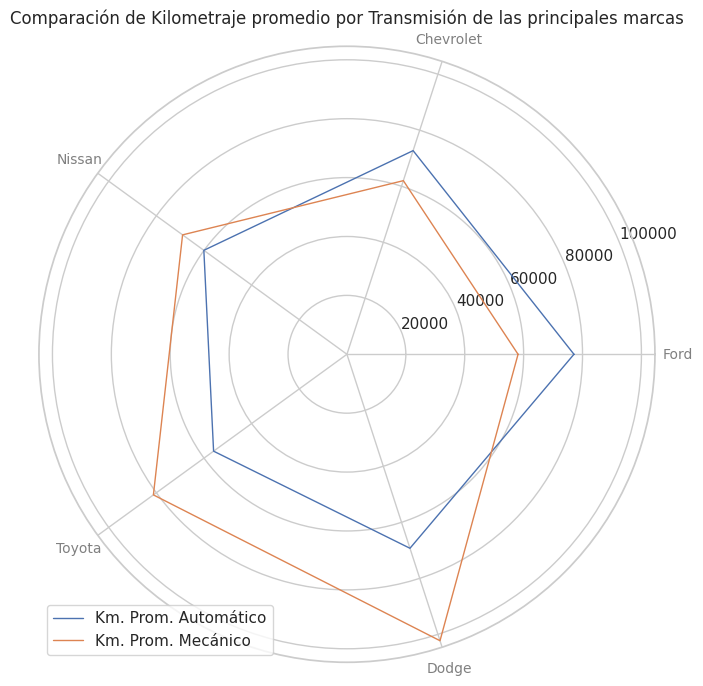

In [ ]:
#Con estas 5 marcas, crearé listas con el kilometraje promedio para sus modelos manuales y automáticos
marcas_top = ['Ford', 'Chevrolet', 'Nissan', 'Toyota','Dodge']  # Asegúrate de usar los nombres correctos de las columnas
n_marcas = len(marcas_top)

#Promedios kilometraje vehiculos automaticos

df_marcas_top_automaticos=df_marcas_top[df_marcas_top['transmission']=='automatic']


promedio_kilometraje_automaticos=df_marcas_top_automaticos.groupby('make')['odometer'].mean()
promedio_kilometraje_automaticos=list(promedio_kilometraje_automaticos)
promedio_kilometraje_automaticos += promedio_kilometraje_automaticos[:1]

#Promedios kilometraje vehiculos manuales

df_marcas_top_manual=df_marcas_top[df_marcas_top['transmission']=='manual']


promedio_kilometraje_manual=df_marcas_top_manual.groupby('make')['odometer'].mean()
promedio_kilometraje_manual=list(promedio_kilometraje_manual)
promedio_kilometraje_manual += promedio_kilometraje_manual[:1]

#Ahora grafico en un gráfico de radar los promedios de kilometraje por marca

angulos = [i/n_marcas* 2 * np.pi for i in range(n_marcas)]
angulos += angulos[:1]  # Para cerrar el círculo

fig,ax=plt.subplots(nrows=1,ncols=1,figsize=(8,8),
                    subplot_kw=dict(polar=True))

plt.xticks(angulos[:-1],marcas_top,color='gray',size=10)

ax.plot(angulos,promedio_kilometraje_automaticos,linewidth=1,linestyle='solid')


ax.plot(angulos,promedio_kilometraje_manual,linewidth=1,linestyle='solid')

plt.title('Comparación de Kilometraje promedio por Transmisión de las principales marcas')
plt.legend(labels=('Km. Prom. Automático','Km. Prom. Mecánico'),loc='lower left')



El gráfico radar nos permite comparar a las 5 marcas a la vez respecto a su kilometraje promedio para autos automáticos y mecánicos. Como se puede observar, el kilometraje promedio más alto varía dependiendo de la marca. Por ejemplo en la marca Dodge, el kilometraje de los vehículos mecánicos es muy superior a los automáticos. Sin embargo, en marcas como Chevrolet o Ford, los vehículos automáticos tienen un kilometraje promedio considerablemente más alto.

Es por esto que no podemos concluir que la hipótesis sea cierta, ya que los resultados no son concluyentes en todas las marcas estudiadas.